# Setup

In [ ]:
# !pip uninstall tensorflow tensorflow-hub -y

In [ ]:
# !pip install tensorflow==2.13.0 tensorflow-hub==0.12.0

# Flower Detector

In [4]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random as rn

import cv2
from tqdm import tqdm
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [5]:
pwd

'/content'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
my_data= '/content/drive/MyDrive/DL/flowers'
my_data

'/content/drive/MyDrive/DL/flowers'

In [8]:
os.listdir(my_data)

['daisy', 'rose', 'sunflower', 'dandelion', 'train', 'test']

In [9]:
X = []
Z = []
IMG_SIZE = 150
FLOWER_DAISY_DIR = my_data + '/daisy/'
FLOWER_SUNFLOWER_DIR = my_data + '/sunflower/'
FLOWER_TULIP_DIR = my_data + '/tulip/'
FLOWER_DANDI_DIR = my_data + '/dandelion/'
FLOWER_ROSE_DIR = my_data + '/rose/'
FLOWER_ROSE_DIR

'/content/drive/MyDrive/DL/flowers/rose/'

In [10]:
data_folder = '/content/drive/MyDrive/DL/flowers'

import os
import shutil

train_folder = os.path.join(data_folder, 'train')
test_folder = os.path.join(data_folder, 'test')

train_folder

'/content/drive/MyDrive/DL/flowers/train'

In [11]:
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

classes = ['daisy', 'dandelion', 'rose', 'sunflower']
classes

['daisy', 'dandelion', 'rose', 'sunflower']

In [12]:
for flower_class in classes:

    train_class_folder = os.path.join(train_folder, flower_class)
    test_class_folder = os.path.join(test_folder, flower_class)
    # create folders
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

## Randomly add images to train folders

In [13]:
import random

split_ratio = 0.8  # Train için %80, Test için %20
for flower_class in classes:
    flower_images = os.listdir(os.path.join(data_folder, flower_class))
    random.shuffle(flower_images)

    split_index = int(len(flower_images) * split_ratio)

    for image in flower_images[:split_index]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(train_folder, flower_class, image)
        shutil.copy(src, dest)

    for image in flower_images[split_index:]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(test_folder, flower_class, image)
        shutil.copy(src, dest)


In [14]:
train_path = my_data+'/train/'
test_path = my_data+'/test/'
print(os.listdir(train_path))
print(os.listdir(test_path))

['daisy', 'dandelion', 'rose', 'sunflower']
['daisy', 'dandelion', 'rose', 'sunflower']


In [15]:
import os
import matplotlib.pyplot as plt

classes = ['daisy', 'dandelion', 'rose', 'sunflower']

data_dir = '/content/drive/MyDrive/DL/flowers'

total_counts = []
total = 0
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len([fname for fname in os.listdir(class_dir) if fname.endswith('.jpg')])
    total_counts.append(num_images)
    total += num_images
    print(class_dir)
    print('num of Imgs =', num_images)

print('TOTAL = ',total)
total_counts

/content/drive/MyDrive/DL/flowers/daisy
num of Imgs = 390
/content/drive/MyDrive/DL/flowers/dandelion
num of Imgs = 425
/content/drive/MyDrive/DL/flowers/rose
num of Imgs = 389
/content/drive/MyDrive/DL/flowers/sunflower
num of Imgs = 388
TOTAL =  1592


[390, 425, 389, 388]

In [16]:
import seaborn as sns
from skimage.io import imread
import os

x = []
y = []
hue = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)

    for image_name in os.listdir(class_dir):
        if image_name.endswith('.jpg'):  # Sadece .jpg dosyalarını işle
            img = imread(os.path.join(class_dir, image_name))
            d1, d2, colors = img.shape
            x.append(d1)
            y.append(d2)
            hue.append(class_name)


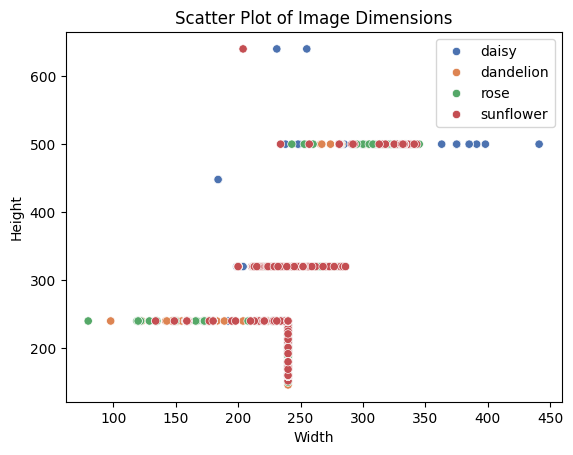

In [17]:
sns.scatterplot(x=x, y=y, hue=hue, palette="deep")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Dimensions')
plt.show()

In [18]:
print(np.mean(x), np.mean(y))

250.5910878112713 336.9357798165138


In [19]:
path1=train_path+'/daisy'+"/2001380507_19488ff96a_n.jpg"
path1

'/content/drive/MyDrive/DL/flowers/train//daisy/2001380507_19488ff96a_n.jpg'

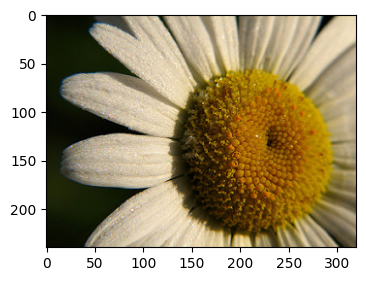

In [20]:
flower_img=imread(path1)
plt.figure(figsize=(4,5))
plt.imshow(flower_img);

In [21]:
path2=train_path+'/daisy'+"/2213954589_c7da4b1486.jpg"
path2

'/content/drive/MyDrive/DL/flowers/train//daisy/2213954589_c7da4b1486.jpg'

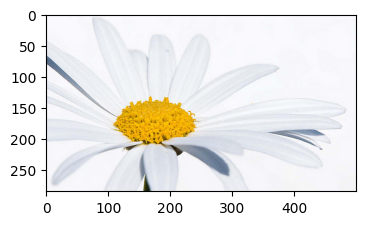

In [22]:
s_flower_img=imread(path2)
plt.figure(figsize=(4,5))
plt.imshow(s_flower_img);

In [23]:
s_img = imread(path2)

s_d1, s_d2, s_colors = s_img.shape
print(s_d1, s_d2, s_colors)

285 500 3


In [24]:
flower_img.max(), flower_img.min()

(255, 0)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

flower_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allowe horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
flower_gen

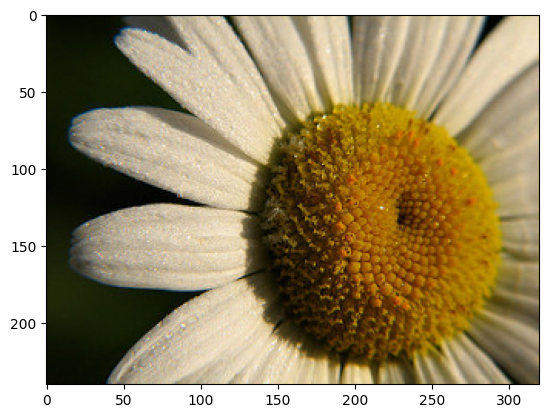

In [26]:
plt.imshow(flower_img)

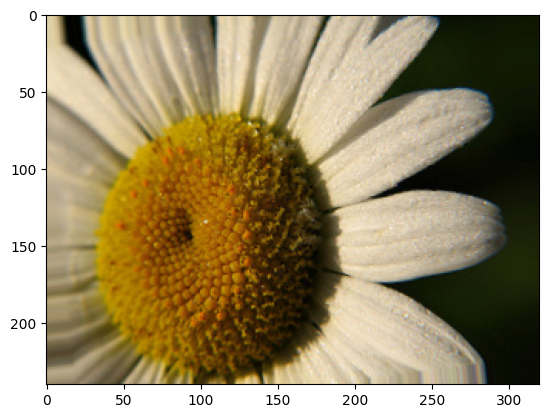

In [27]:
plt.imshow(flower_gen.random_transform(flower_img))

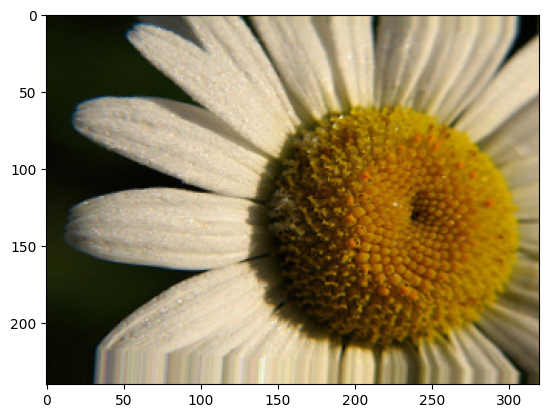

In [28]:
plt.imshow(flower_gen.random_transform(flower_img))

# Create The Model

In [29]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [30]:
from tensorflow.keras.layers import BatchNormalization

## Train Images

In [31]:
batch_size = 32
train_flower_gen = flower_gen.flow_from_directory(train_path,

                                               target_size=(224,224),

                                               color_mode='rgb',

                                               batch_size=batch_size,

                                               class_mode='sparse', shuffle=True)

Found 1526 images belonging to 4 classes.


## Test Images

In [32]:
flower_gen_test = ImageDataGenerator()

test_flower_gen = flower_gen_test.flow_from_directory(test_path,

                                                   target_size=(224,224),

                                                   color_mode='rgb',

                                                   batch_size=batch_size,

                                                   class_mode='sparse', shuffle=True)

Found 572 images belonging to 4 classes.


# ResNet152

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf

image_shape = (224, 224, 3)

# Create a Sequential model
resnet_model = Sequential()

# Add an Input layer
resnet_model.add(Input(shape=image_shape))

# Load the pre-trained ResNet152 model
pretrained_model = tf.keras.applications.ResNet152(include_top=False,
                                                   input_shape=image_shape,
                                                   pooling='avg',
                                                   weights="imagenet")

# Freeze the pre-trained model layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained ResNet model to the Sequential model
resnet_model.add(pretrained_model)

# Add dense layers
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))

# Compile the model
resnet_model.compile(loss='sparse_categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

# Now the model summary should work
resnet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 59486212 (226.92 MB)
Trainable params: 1115268 (4.25 MB)
Non-trainable params: 58370944 (222.67 MB)
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# If early stopping is triggered during training, `restore_best_weights` replaces
# the model's weights with the weights that gave the best value for the monitored metric.
# If the loss value starts increasing after a certain point and causes the model to stop,
# this parameter ensures that the weights are replaced with the score where the loss value was lowest.

In [36]:
history_resnet152 = resnet_model.fit(train_flower_gen,epochs=10,
                    validation_data=test_flower_gen,
                    callbacks=[early_stop])

Epoch 1/10
48/48 [==============================] - 695s 14s/step - loss: 1.3419 - accuracy: 0.3650 - val_loss: 7.5557 - val_accuracy: 0.2500
Epoch 2/10
48/48 [==============================] - 667s 14s/step - loss: 1.2317 - accuracy: 0.4371 - val_loss: 9.4459 - val_accuracy: 0.2500
Epoch 3/10
48/48 [==============================] - 708s 15s/step - loss: 1.2078 - accuracy: 0.4436 - val_loss: 10.6293 - val_accuracy: 0.2500
Epoch 4/10
48/48 [==============================] - 651s 14s/step - loss: 1.1969 - accuracy: 0.4535 - val_loss: 11.6873 - val_accuracy: 0.2500


In [36]:
resnet_model.evaluate(test_flower_gen)

# VGG16

In [37]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

# Define the input shape (height, width, channels)
image_shape = (224, 224, 3)

# Build the model using Sequential
vgg16_model = Sequential()

# Add an Input layer to explicitly specify the input shape
vgg16_model.add(Input(shape=image_shape))

# Load the VGG16 model with pre-trained ImageNet weights, without the top layers
pretrained_model = VGG16(include_top=False, weights='imagenet', pooling='avg')

# Set the pre-trained model layers to be non-trainable
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained VGG16 model to the Sequential model
vgg16_model.add(pretrained_model)

# Add custom Dense layers
vgg16_model.add(Dense(128, activation='relu'))
vgg16_model.add(Dense(4, activation='softmax'))

# Compile the model
vgg16_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Show the summary of the model
vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 4)                 516       
                                                                 
Total params: 14780868 (56.38 MB)
Trainable params: 66180 (258.52 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [38]:
history_vgg16 = vgg16_model.fit(
    train_flower_gen,
    epochs=10,
    validation_data=test_flower_gen,
    callbacks=[early_stop]
)

Epoch 1/10
48/48 [==============================] - 782s 16s/step - loss: 1.1155 - accuracy: 0.5714 - val_loss: 5.0871 - val_accuracy: 0.5822
Epoch 2/10
48/48 [==============================] - 872s 18s/step - loss: 0.7915 - accuracy: 0.7300 - val_loss: 6.7493 - val_accuracy: 0.6486
Epoch 3/10
48/48 [==============================] - 799s 17s/step - loss: 0.6618 - accuracy: 0.7772 - val_loss: 8.0774 - val_accuracy: 0.6451
Epoch 4/10
48/48 [==============================] - 839s 18s/step - loss: 0.5952 - accuracy: 0.7995 - val_loss: 9.2910 - val_accuracy: 0.6416


In [39]:
summary = pd.DataFrame(vgg16_model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.115511,0.571429,5.087105,0.582168
1,0.791459,0.730013,6.749327,0.648601
2,0.661787,0.777195,8.077415,0.645105
3,0.595233,0.799476,9.291012,0.641608


In [40]:
vgg16_model.evaluate(test_flower_gen)

18/18 [==============================] - 209s 12s/step - loss: 5.0871 - accuracy: 0.5822


[5.0871052742004395, 0.5821678042411804]

# EfficientNet

In [43]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)
print("NumPy version:", np.__version__)

TensorFlow version: 2.13.0
TensorFlow Hub version: 0.12.0
NumPy version: 1.24.3


In [44]:
import tensorflow_hub as hub
from tensorflow.keras import layers, models

model_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# Input Layer
inputs = layers.Input(shape=(224, 224, 3))

# Keras Layer
keras_layer = hub.KerasLayer(model_url, trainable=False)(inputs)

# Dense Layers
x = layers.Dense(128, activation='relu')(keras_layer)
outputs = layers.Dense(4, activation='softmax')(x)

# Create Model
efficientnet_model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
efficientnet_model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Display the model summary
efficientnet_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 dense_7 (Dense)             (None, 128)               163968    
                                                                 
 dense_8 (Dense)             (None, 4)                 516       
                                                                 
Total params: 4214048 (16.08 MB)
Trainable params: 164484 (642.52 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [45]:
# import tensorflow as tf
# import tensorflow_hub as hub
# import numpy as np

# print("TensorFlow version:", tf.__version__)
# print("TensorFlow Hub version:", hub.__version__)
# print("NumPy version:", np.__version__)
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [ ]:
# Fit the model
history_efficientnet = efficientnet_model.fit(
    train_flower_gen,
    epochs=6,
    validation_data=test_flower_gen,
    callbacks=[early_stop]
)

Epoch 1/6
48/48 [==============================] - 161s 3s/step - loss: 0.4346 - accuracy: 0.8427 - val_loss: 1661.2113 - val_accuracy: 0.2168
Epoch 2/6
48/48 [==============================] - 152s 3s/step - loss: 0.1679 - accuracy: 0.9476 - val_loss: 1615.2103 - val_accuracy: 0.2045
Epoch 3/6
48/48 [==============================] - 148s 3s/step - loss: 0.0988 - accuracy: 0.9751 - val_loss: 1604.4357 - val_accuracy: 0.2063
Epoch 4/6
48/48 [==============================] - 152s 3s/step - loss: 0.0773 - accuracy: 0.9771 - val_loss: 1996.8684 - val_accuracy: 0.2080
Epoch 5/6
48/48 [==============================] - 150s 3s/step - loss: 0.0606 - accuracy: 0.9843 - val_loss: 2015.6219 - val_accuracy: 0.2238
Epoch 6/6
48/48 [==============================] - 155s 3s/step - loss: 0.0417 - accuracy: 0.9895 - val_loss: 2626.9851 - val_accuracy: 0.2133


In [ ]:
import pandas as pd

# The history object returned by fit() contains the metrics directly
summary = pd.DataFrame(history_efficientnet.history)
summary.head()


,loss,accuracy,val_loss,val_accuracy
0,0.434621,0.842726,1661.211304,0.216783
1,0.167893,0.947575,1615.210327,0.204545
2,0.098793,0.975098,1604.435669,0.206294
3,0.077307,0.977064,1996.868408,0.208042
4,0.060593,0.984273,2015.621948,0.223776


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = efficientnet_model.evaluate(test_flower_gen)

# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


18/18 [==============================] - 38s 2s/step - loss: 1604.4358 - accuracy: 0.2063
Test Loss: 1604.4358
Test Accuracy: 0.2063


# Xception

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

xception_base = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(299, 299, 3)
)

xception_base.trainable = False

xception_model = Sequential([
    xception_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

xception_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
xception_model.summary()

83683744/83683744 [==============================] - 3s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_9 (Dense)             (None, 128)               262272    
                                                                 
 dense_10 (Dense)            (None, 4)                 516       
                                                                 
Total params: 21124268 (80.58 MB)
Trainable params: 262788 (1.00 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [ ]:
history_xception = xception_model.fit(
    train_flower_gen,
    epochs=5,
    validation_data=test_flower_gen,
    callbacks=[early_stop]
)

Epoch 1/5
48/48 [==============================] - 348s 7s/step - loss: 0.5464 - accuracy: 0.7864 - val_loss: 17.4845 - val_accuracy: 0.2640
Epoch 2/5
48/48 [==============================] - 390s 8s/step - loss: 0.2985 - accuracy: 0.8886 - val_loss: 21.9395 - val_accuracy: 0.2535
Epoch 3/5
48/48 [==============================] - 325s 7s/step - loss: 0.2351 - accuracy: 0.9142 - val_loss: 26.5852 - val_accuracy: 0.2378
Epoch 4/5
48/48 [==============================] - 388s 8s/step - loss: 0.2388 - accuracy: 0.9122 - val_loss: 27.3847 - val_accuracy: 0.2255


In [ ]:
summary = pd.DataFrame(xception_model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.546450,0.786370,17.484520,0.263986
1,0.298515,0.888598,21.939489,0.253496
2,0.235132,0.914155,26.585247,0.237762
3,0.238836,0.912189,27.384693,0.225524


In [ ]:
xception_model.evaluate(test_flower_gen)

18/18 [==============================] - 86s 5s/step - loss: 17.4845 - accuracy: 0.2640


[17.484519958496094, 0.2639860212802887]

# Model Performance

In [ ]:
import matplotlib.pyplot as plt

def plot_model_performance(history, title='Model Performance'):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Acc')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

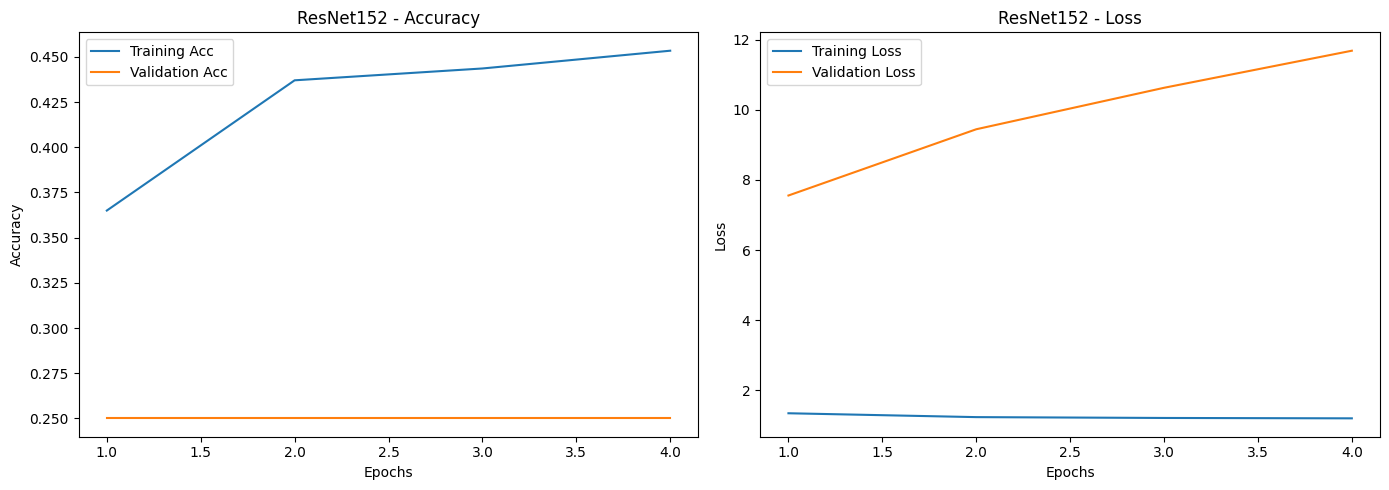

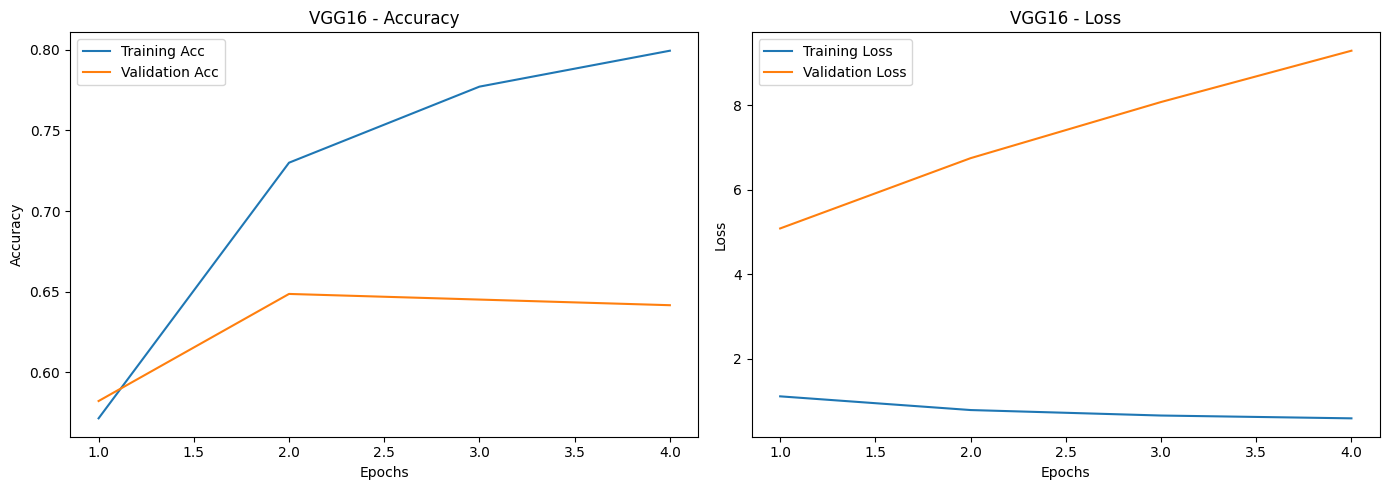

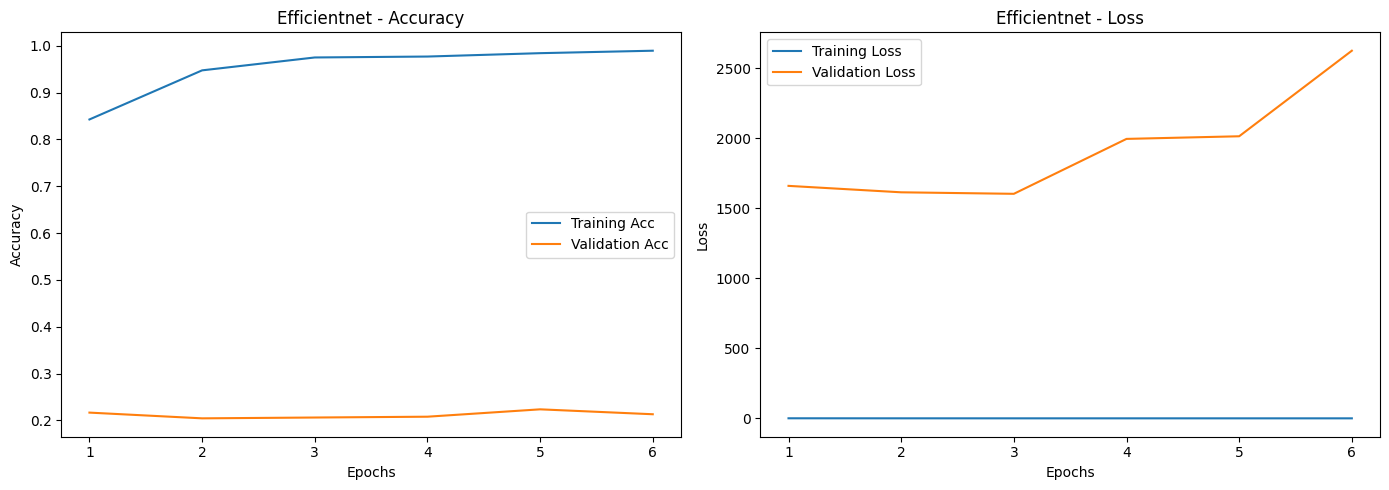

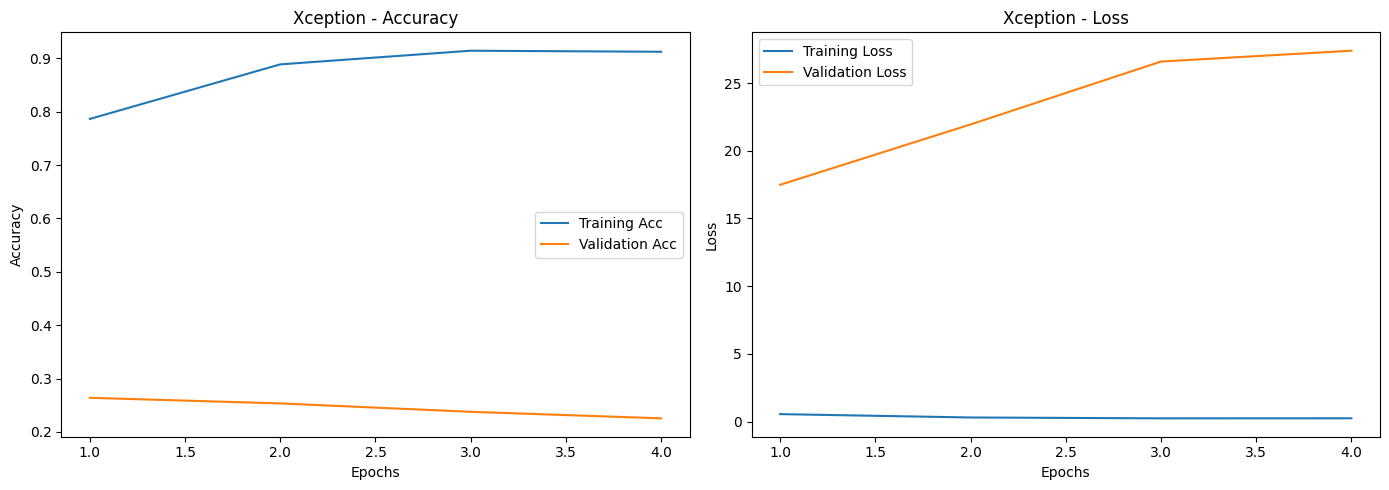

In [ ]:
plot_model_performance(history_resnet152, 'ResNet152')

plot_model_performance(history_vgg16, 'VGG16')

plot_model_performance(history_efficientnet, 'Efficientnet')

plot_model_performance(history_xception, 'Xception')


# Finaly Selected Model

In [ ]:
history_efficientnet.metrics_names

AttributeError: 'History' object has no attribute 'metrics_names'

In [ ]:
history_efficientnet.evaluate(test_flower_gen)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
pred_probabilities = history_efficientnet.predict(test_flower_gen)

In [ ]:
pred_probabilities

In [ ]:
test_flower_gen.classes

In [ ]:
pred_probabilities


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
test_flower_gen.classes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Bağlantıyı ve dizini kontrol edin
!echo "Drive İçeriği:"
!ls "/content/drive/My Drive"

In [ ]:
model_save_path = '/content/drive/MyDrive/flowers_model'
convnext_tiny_model.save(model_save_path)

# Predicting on an Image

In [ ]:
train_flower_gen.class_indices

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

model = tf.keras.models.load_model(
    model_save_path,
    custom_objects={'KerasLayer': hub.KerasLayer}
)
image = Image.open('/content/drive/MyDrive/DL_Flowers_Project/tulip.jpg')
image = image.resize((224, 224))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

prediction = model.predict(image_array)

predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)